In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
data=pd.read_csv('/content/hypothyroid.csv')

In [ ]:
data.head(10)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P
5,18,F,t,f,f,f,f,f,f,f,...,t,183,t,1.3,t,141,f,?,other,P
6,59,F,f,f,f,f,f,f,f,f,...,t,72,t,0.92,t,78,f,?,other,P
7,80,F,f,f,f,f,f,f,f,f,...,t,80,t,0.7,t,115,f,?,SVI,P
8,66,F,f,f,f,f,f,f,f,f,...,t,123,t,0.93,t,132,f,?,SVI,P
9,68,M,f,f,f,f,f,f,f,f,...,t,83,t,0.89,t,93,f,?,SVI,P


In [ ]:
data.shape

(3772, 27)

In [ ]:
import sys
import numpy as np
import matplotlib
import sklearn

print("Python version:", sys.version)
print("NumPy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Scikit-learn version:", sklearn.__version__)


Python version: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
NumPy version: 1.25.2
Matplotlib version: 3.7.1
Scikit-learn version: 1.2.2


In [ ]:
import google.colab
print(google.colab.__version__)

0.0.1a2


In [ ]:
data.describe()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,2
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,P
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3541,231,3385,387,3387,385,3772,3772,2201,3481


In [ ]:
data.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'binaryClass'],
      dtype='object')

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
binaryClass                  0
dtype: int64


In [ ]:
import seaborn as sns

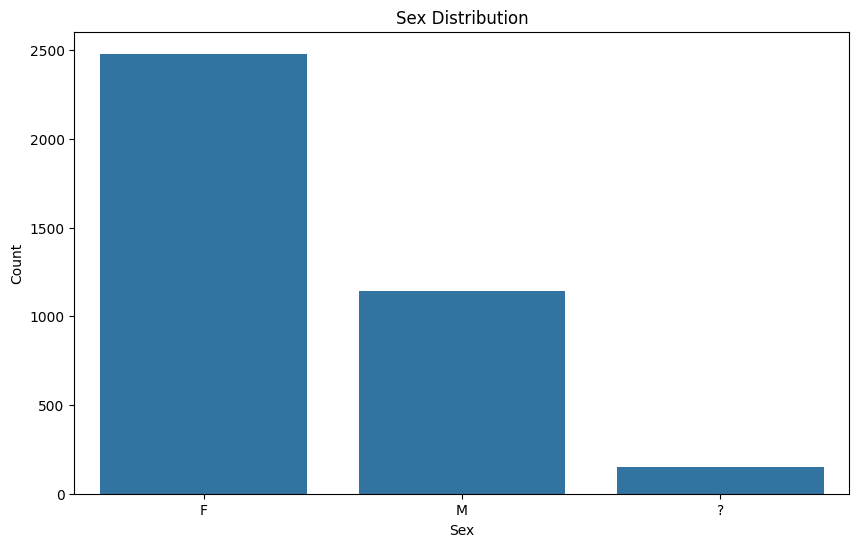

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=data)
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

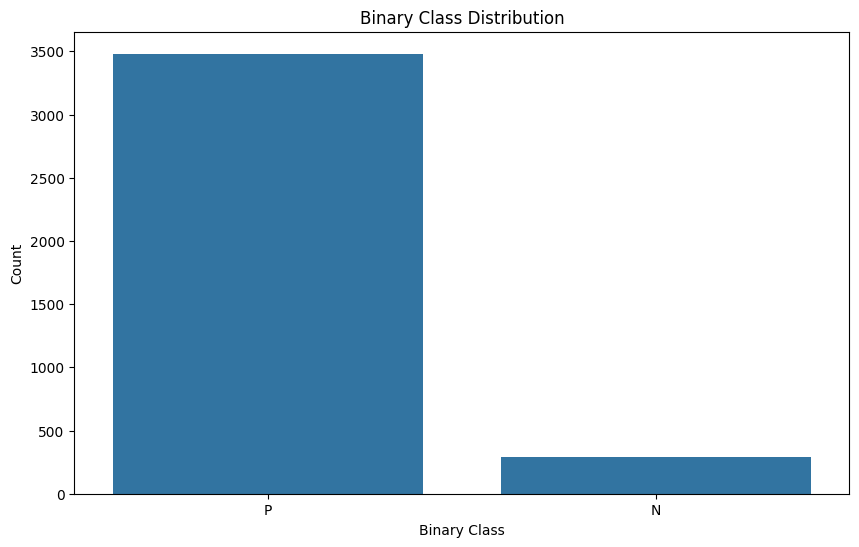

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='binaryClass', data=data)
plt.title('Binary Class Distribution')
plt.xlabel('Binary Class')
plt.ylabel('Count')
plt.show()

In [ ]:
# Replace '?' with NaN
data.replace('?', np.nan, inplace=True)

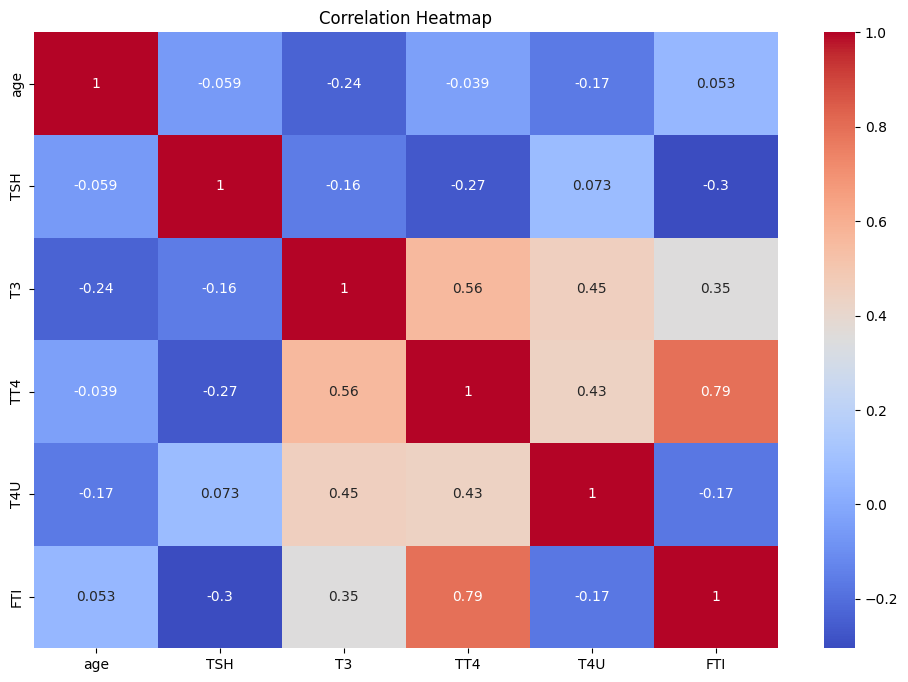

In [ ]:
numerical_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

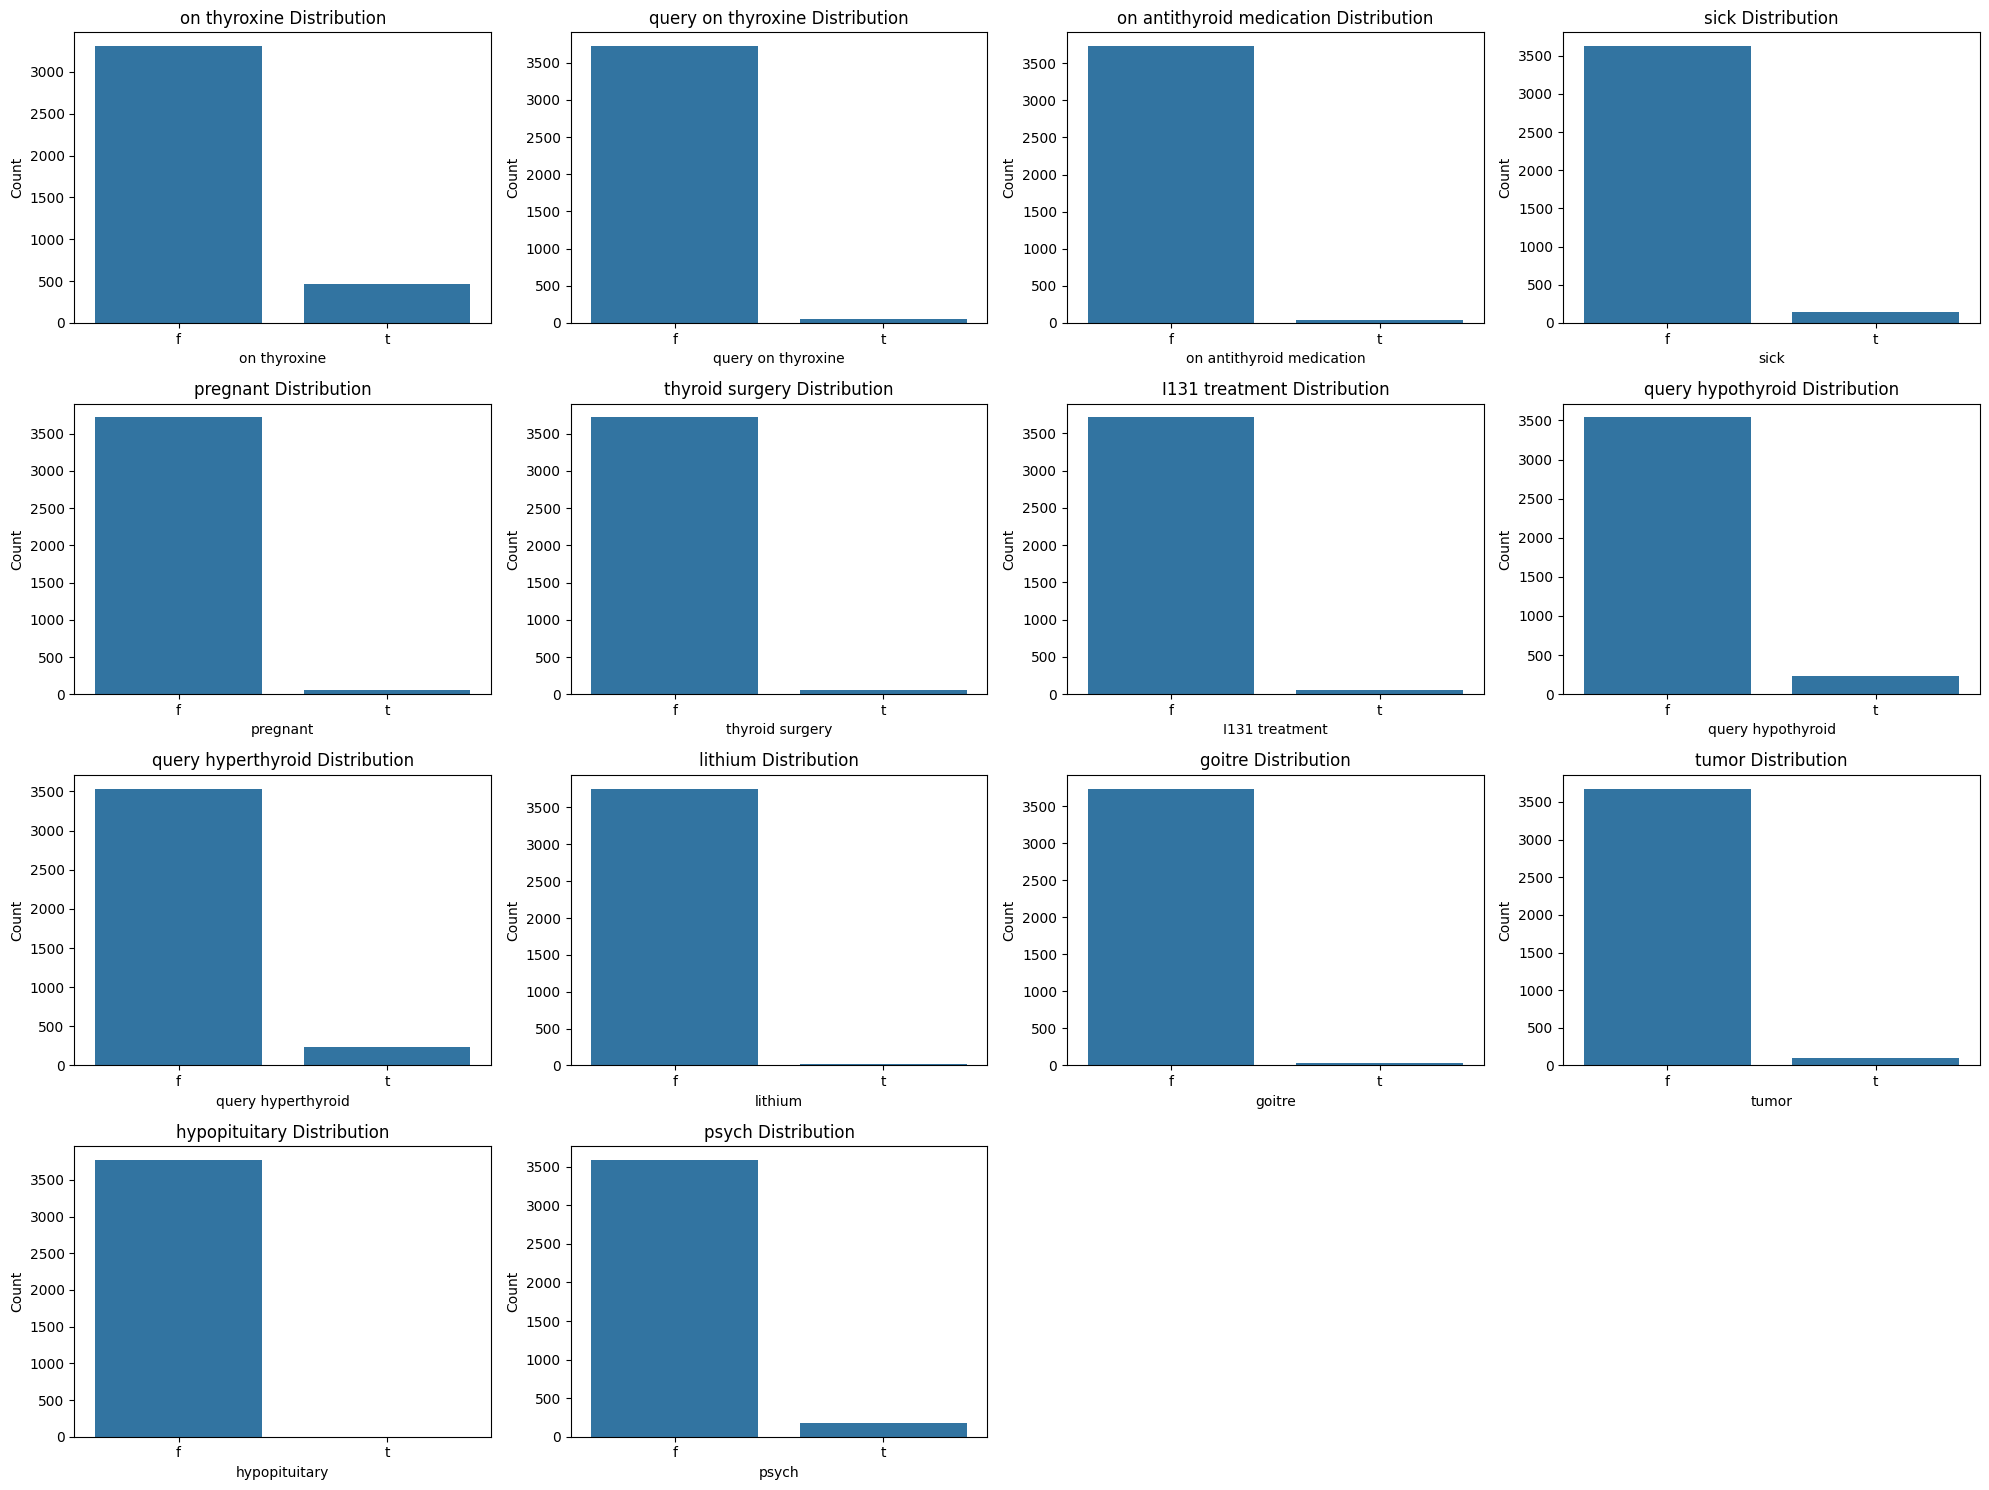

In [ ]:
# Countplots for categorical features related to thyroid conditions
categorical_features = ['on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick',
                        'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid',
                        'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary',
                        'psych']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features):
    plt.subplot(4, 4, i+1)
    sns.countplot(x=feature, data=data)
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


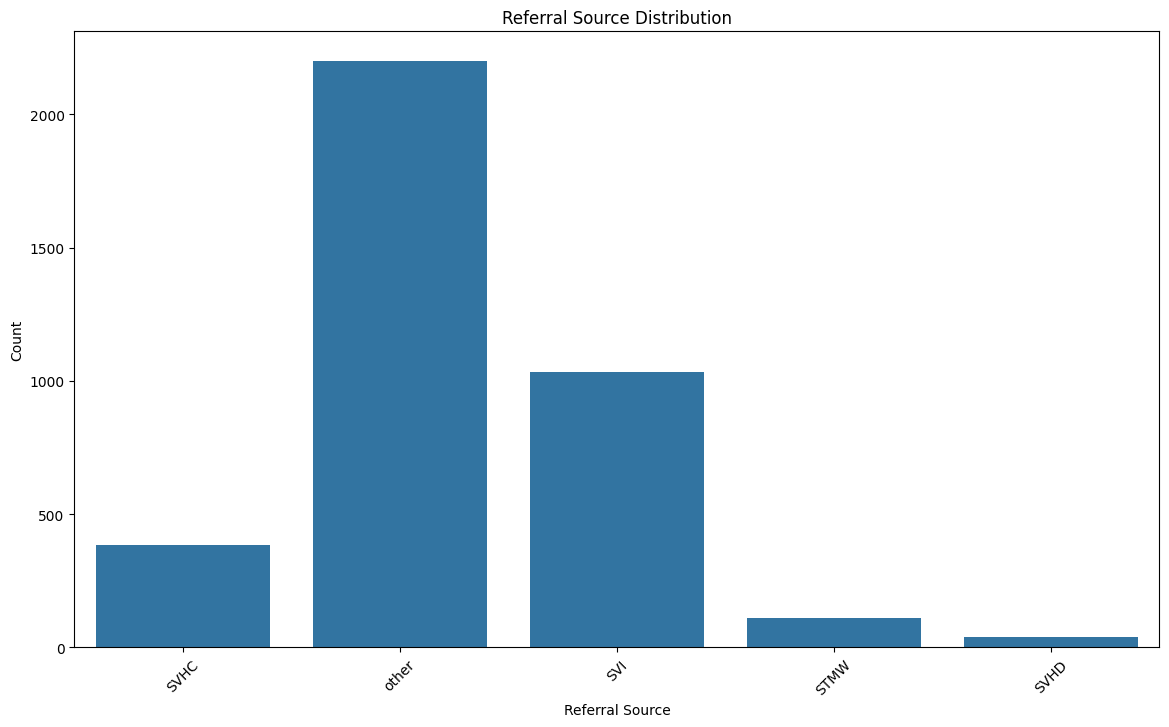

In [ ]:
# Analyzing referral source
plt.figure(figsize=(14, 8))
sns.countplot(x='referral source', data=data)
plt.title('Referral Source Distribution')
plt.xlabel('Referral Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

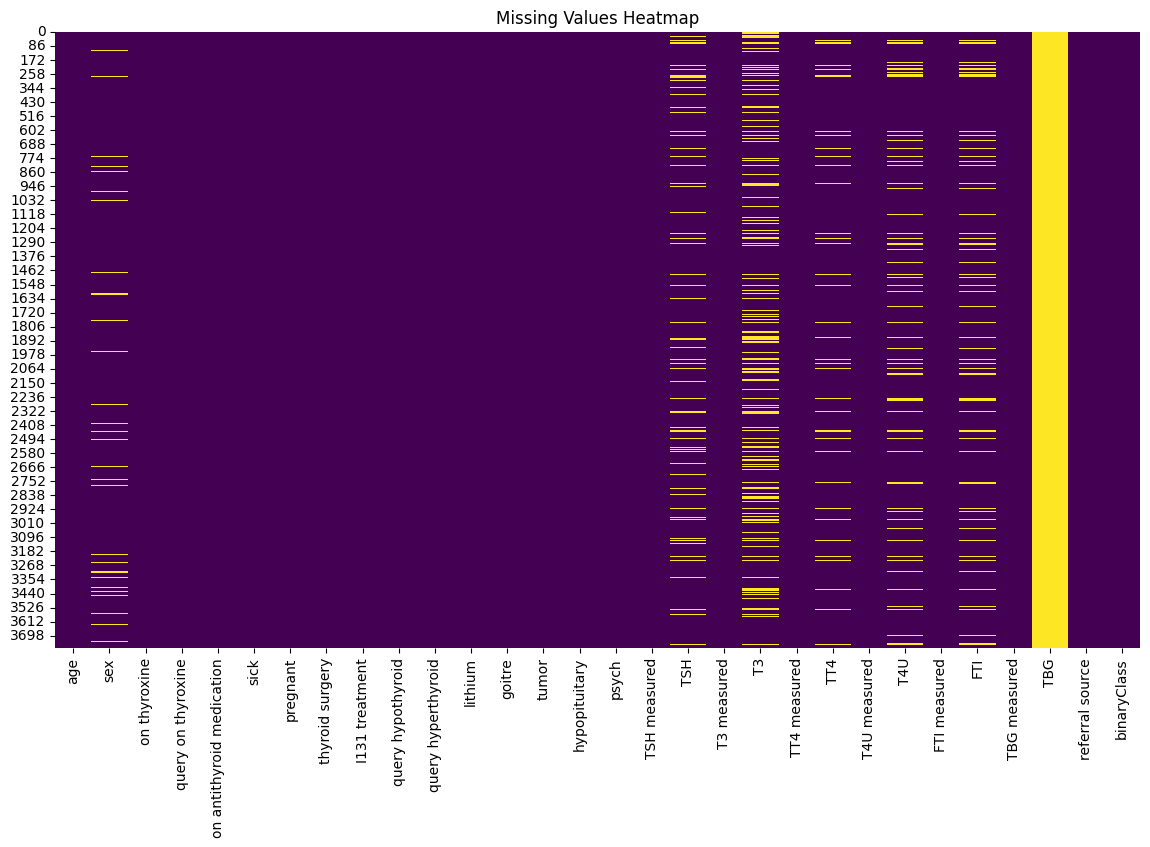

In [ ]:
# Missing values heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
# Drop columns with more than 50% missing values
threshold = len(data) * 0.5
data = data.dropna(thresh=threshold, axis=1)

# Impute missing values for numerical columns with the mean
for column in data.select_dtypes(include=[np.number]).columns:
    data[column].fillna(data[column].mean(), inplace=True)

# Impute missing values for categorical columns with the mode
for column in data.select_dtypes(include=[object]).columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

data.drop(columns=['TBG measured'], inplace=True)
data.drop(columns=['referral source'], inplace=True)

<ipython-input-18-a80f05bb356a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column].fillna(data[column].mode()[0], inplace=True)
<ipython-input-18-a80f05bb356a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['TBG measured'], inplace=True)
<ipython-input-18-a80f05bb356a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['referral source'], inplace=True)


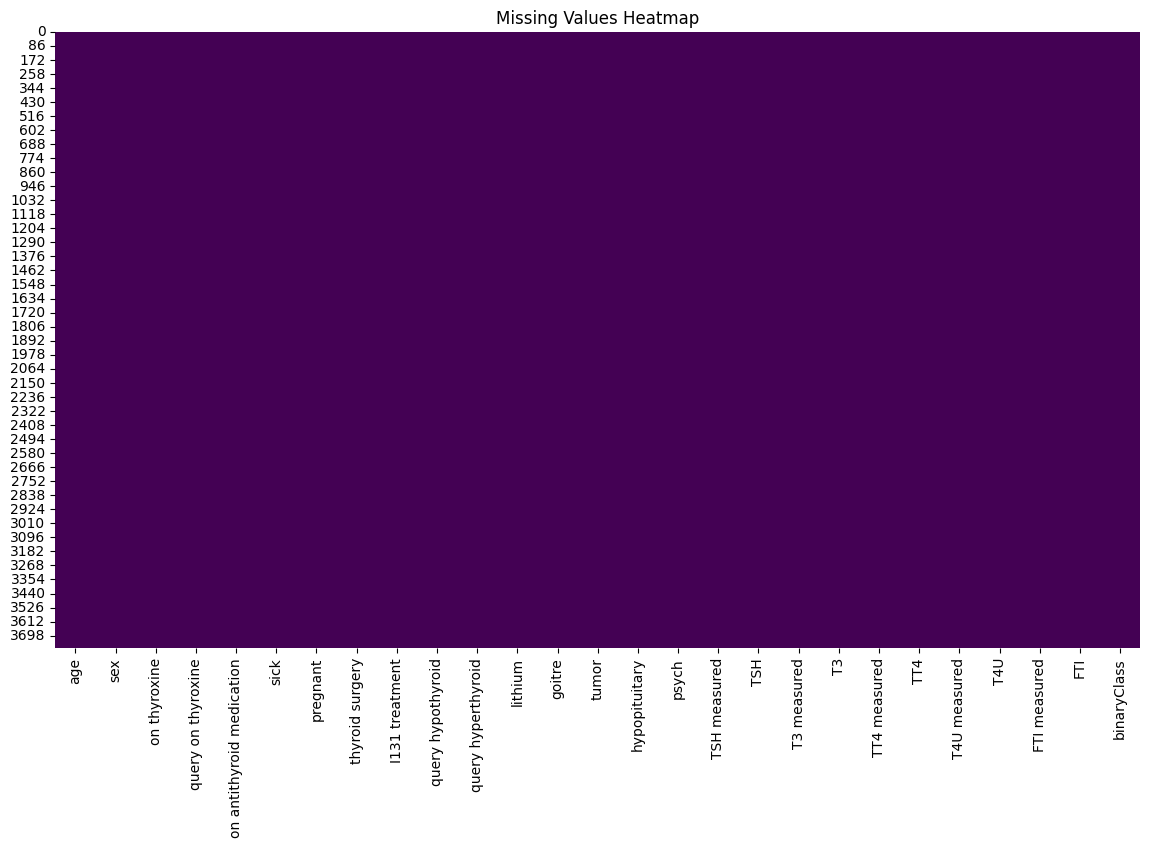

In [ ]:
# Missing values heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [ ]:
data.head(15)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,1.3,t,2.5,t,125,t,1.14,t,109,P
1,23,F,f,f,f,f,f,f,f,f,...,4.1,t,2,t,102,f,0.99,f,100,P
2,46,M,f,f,f,f,f,f,f,f,...,0.98,f,2,t,109,t,0.91,t,120,P
3,70,F,t,f,f,f,f,f,f,f,...,0.16,t,1.9,t,175,f,0.99,f,100,P
4,70,F,f,f,f,f,f,f,f,f,...,0.72,t,1.2,t,61,t,0.87,t,70,P
5,18,F,t,f,f,f,f,f,f,f,...,0.03,f,2,t,183,t,1.3,t,141,P
6,59,F,f,f,f,f,f,f,f,f,...,0.2,f,2,t,72,t,0.92,t,78,P
7,80,F,f,f,f,f,f,f,f,f,...,2.2,t,0.6,t,80,t,0.7,t,115,P
8,66,F,f,f,f,f,f,f,f,f,...,0.6,t,2.2,t,123,t,0.93,t,132,P
9,68,M,f,f,f,f,f,f,f,f,...,2.4,t,1.6,t,83,t,0.89,t,93,P


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [ ]:
# Select numerical columns
numerical_cols = ['age', 'TSH', 'T3', 'TT4','T4U', 'FTI']
numerical_data = data[numerical_cols].astype(float)

# Apply Min-Max Scaling
min_max_scaler = MinMaxScaler()
min_max_scaled_data = min_max_scaler.fit_transform(numerical_data)

# Create a DataFrame with Min-Max scaled data
min_max_scaled_df = pd.DataFrame(min_max_scaled_data, columns=numerical_cols)

# Integrate scaled data back into the original DataFrame
new_data = data.drop(columns=numerical_cols)
new_data = pd.concat([new_data, min_max_scaled_df], axis=1)



In [ ]:
new_data['sex'] = new_data['sex'].map({'M': 0, 'F': 1})
columns_to_map = [
    'on thyroxine', 'query on thyroxine', 'on antithyroid medication',
    'sick', 'pregnant', 'thyroid surgery', 'I131 treatment',
    'query hypothyroid', 'query hyperthyroid', 'lithium',
    'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured','T3 measured',
    'TT4 measured','T4U measured','FTI measured'
]
new_data['binaryClass'] = new_data['binaryClass'].map({'N': 0, 'P': 1})
for col in columns_to_map:
    new_data[col] = new_data[col].map({'f': 0, 't': 1})


In [ ]:
new_data.head()

,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,...,TT4 measured,T4U measured,FTI measured,binaryClass,age,TSH,T3,TT4,T4U,FTI
0,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0.088106,0.002443,0.232227,0.287383,0.429952,0.272265
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0.048458,0.007726,0.184834,0.233645,0.357488,0.249364
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0.099119,0.001840,0.184834,0.250000,0.318841,0.300254
3,1,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0.151982,0.000292,0.175355,0.404206,0.357488,0.249364
4,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0.151982,0.001349,0.109005,0.137850,0.299517,0.173028


In [ ]:
X = new_data.drop('binaryClass', axis=1)
y = new_data['binaryClass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(new_data.dtypes)


sex                            int64
on thyroxine                   int64
query on thyroxine             int64
on antithyroid medication      int64
sick                           int64
pregnant                       int64
thyroid surgery                int64
I131 treatment                 int64
query hypothyroid              int64
query hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH measured                   int64
T3 measured                    int64
TT4 measured                   int64
T4U measured                   int64
FTI measured                   int64
binaryClass                    int64
age                          float64
TSH                          float64
T3                           float64
TT4                          float64
T4U                          float64
FTI                          float64
d

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print("Accuracy:", accuracy)



Confusion Matrix:
 [[ 15  43]
 [  0 697]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.26      0.41        58
           1       0.94      1.00      0.97       697

    accuracy                           0.94       755
   macro avg       0.97      0.63      0.69       755
weighted avg       0.95      0.94      0.93       755

Accuracy: 0.9430463576158941


In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)

print('Confusion Matrix (SVM):\n', confusion_matrix(y_test, y_pred_svm))
print('Classification Report (SVM):\n', classification_report(y_test, y_pred_svm))
print("Accuracy (SVM):", accuracy_svm)



Confusion Matrix (SVM):
 [[  9  49]
 [  0 697]]
Classification Report (SVM):
               precision    recall  f1-score   support

           0       1.00      0.16      0.27        58
           1       0.93      1.00      0.97       697

    accuracy                           0.94       755
   macro avg       0.97      0.58      0.62       755
weighted avg       0.94      0.94      0.91       755

Accuracy (SVM): 0.9350993377483444


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize models
rf_model = RandomForestClassifier(n_estimators=100)
knn_model = KNeighborsClassifier()
dt_model = DecisionTreeClassifier()
xgb_model = XGBClassifier()

models = {
    'K-Nearest Neighbors': knn_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('------------------------------------------------------------------------------------------')
    print(f'\n{name}')
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))
    print("Accuracy:", accuracy)
    print('------------------------------------------------------------------------------------------')


------------------------------------------------------------------------------------------

K-Nearest Neighbors
Confusion Matrix:
 [[ 17  41]
 [  6 691]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.29      0.42        58
           1       0.94      0.99      0.97       697

    accuracy                           0.94       755
   macro avg       0.84      0.64      0.69       755
weighted avg       0.93      0.94      0.93       755

Accuracy: 0.937748344370861
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------

Decision Tree
Confusion Matrix:
 [[ 57   1]
 [  1 696]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        58
           1       1.00      1.00      1.00       697

    accuracy                           1